In [3]:
# 1 Simple Moving average 
# 2 cumulative moving average
# 3 Exponential weigh moving average
# 4 Moving average -> ACF (MA)
# 5 Autoregressive model -> PACF (AR)
# ARMA, ARIMA, ARIMAX , SARIMAX

In [4]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [5]:
df_tesla=pdr.get_data_yahoo("TSLA")

In [6]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
...,...,...,...,...,...,...
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978


In [8]:
 # Simple Rolling down average(Simple Moving average) -> help to smoothen the curver 

<AxesSubplot:xlabel='Date'>

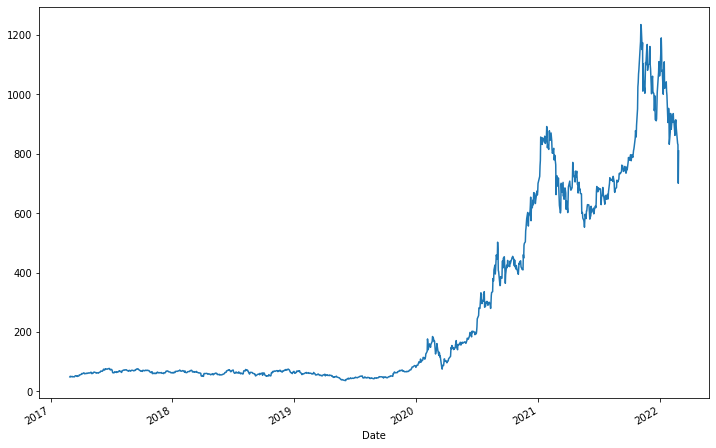

In [12]:
#Simple Moving Average
df_tesla['Open'].plot(figsize=(12,8))


In [21]:
df_tesla['Open: 10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

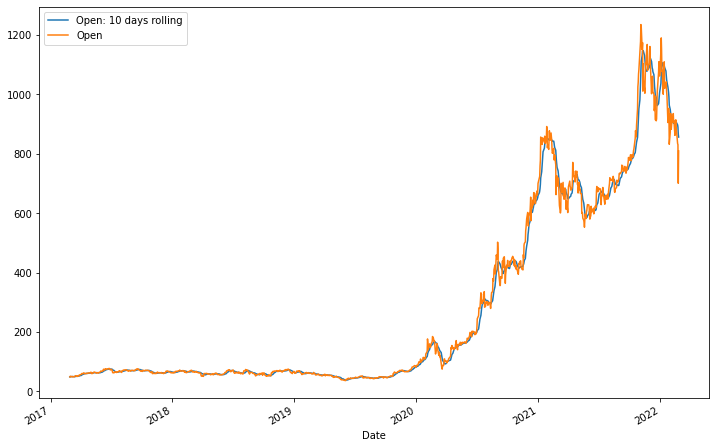

In [22]:
df_tesla[['Open: 10 days rolling','Open']].plot(figsize=(12,8))

<AxesSubplot:xlabel='Date'>

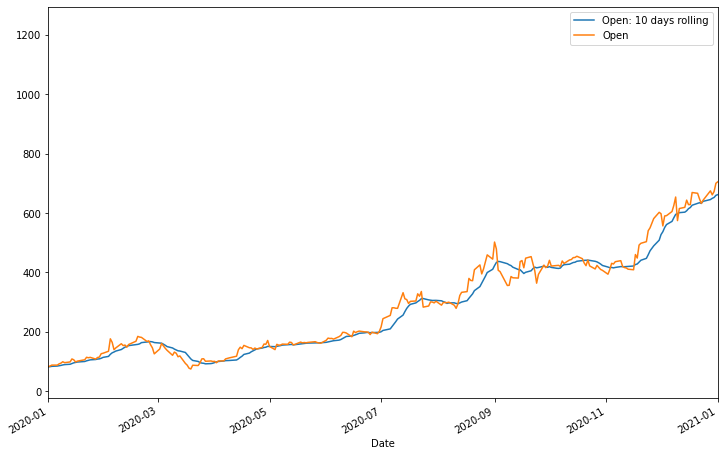

In [23]:
df_tesla[['Open: 10 days rolling','Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(12,8))

In [27]:
df_tesla['Open: 30 days rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open: 50 days rolling']=df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<AxesSubplot:xlabel='Date'>

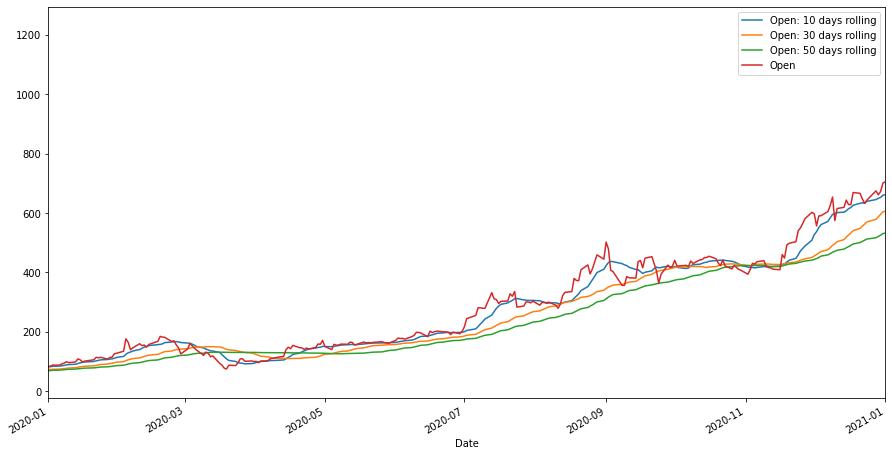

In [30]:
df_tesla[['Open: 10 days rolling','Open: 30 days rolling','Open: 50 days rolling','Open']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,8))

<AxesSubplot:xlabel='Date'>

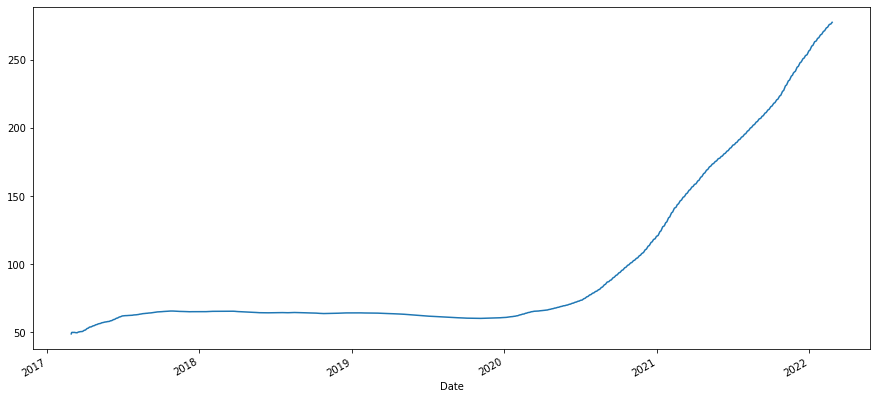

In [34]:
#Cumulative Moving average  (cumulative mean of all the value previosly present)
df_tesla['Open'].expanding().mean().plot(figsize=(15,7))

In [35]:
#EMA - Exponential moving average 
#Formula= ((Open - pre EMA) *  multiplier) + pre EMA
# multiplier = 2/(10+1)  10=> window size

In [ ]:
#EMWA - Exponential weighted moving average
#EMWA (t) = a * x(t) + (1-a) EWMA (t-1) => weight (to prevent lags)
#giving priority to first data instead of the previos one

In [36]:
df_tesla['EMA_0.1']= df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<AxesSubplot:xlabel='Date'>

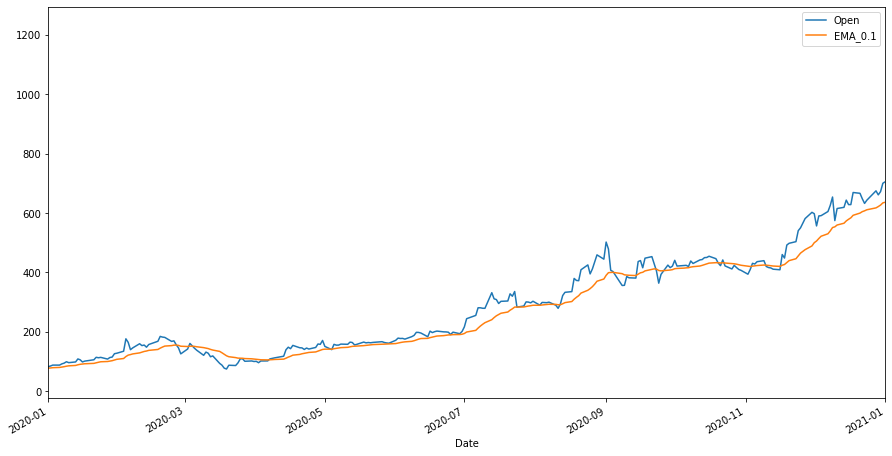

In [37]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,8))

In [38]:
df_tesla['EMA_0.3']= df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean() #smoothening factor 0.3

<AxesSubplot:xlabel='Date'>

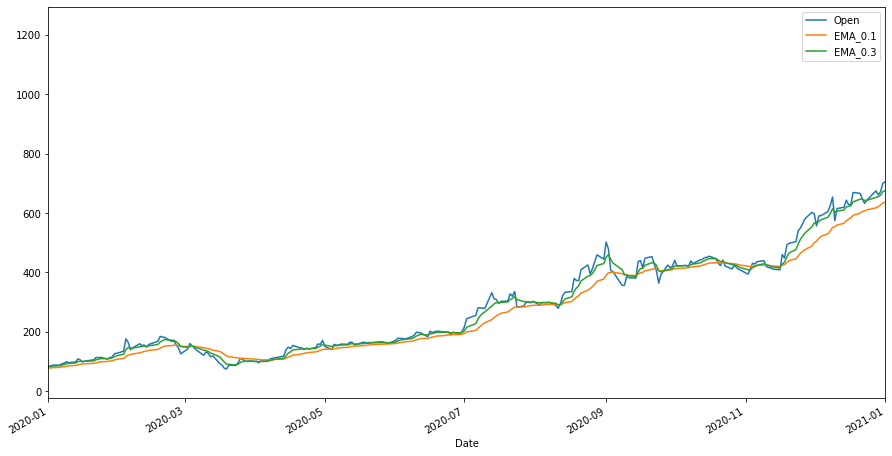

In [41]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,8))

In [45]:
#EWMA - Exponential weighted moving average
df_tesla['EMA_5days']= df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

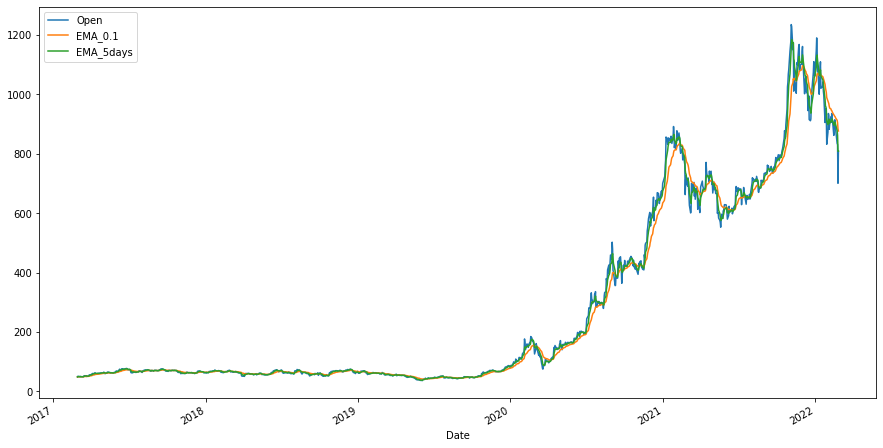

In [46]:
df_tesla[['Open','EMA_0.1','EMA_5days']].plot(figsize=(15,8))